# Exploring characters in datasets and how characters interact to form a word in target language

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cur_dir = Path.cwd()
data_dir = cur_dir / "data"
raw_data_dir = data_dir / "raw_data"
proc_data_dir = data_dir / "processed_data"

sample_file = raw_data_dir / "sample.tsv"
dev_file = raw_data_dir / "te.translit.sampled.dev.tsv"
train_file = proc_data_dir / "train_clean.tsv"
test_file = raw_data_dir / "te.translit.sampled.test.tsv"

In [3]:
names=["target","source", "frequency"]
types = ["string","string","int8"]
col_types = dict(zip(names,types))

In [4]:
df_train= pd.read_csv(train_file, sep='\t',header = None , names=names)
df_dev= pd.read_csv(dev_file, sep='\t',header = None , names=names)
df_test= pd.read_csv(test_file, sep='\t',header = None , names=names)
df_dev.head()

,target,source,frequency
0,అంక,amka,1
1,అంక,anka,3
2,అంకం,amkam,1
3,అంకం,ankam,2
4,అంగీకరించ,amgiikarimcha,1


In [9]:
df_train.source.str.len().value_counts()

9     6551
8     6545
10    6389
7     5981
11    5726
6     4993
12    4869
13    3775
5     3344
14    2839
15    1978
4     1796
16    1262
17     823
3      558
18     490
19     271
20     144
2       86
21      64
22      34
23      14
24      10
25       5
1        2
Name: source, dtype: int64

In [5]:
df_train.target.str.len().value_counts()

8     8555
6     8448
7     7914
9     6758
10    5419
5     5170
4     4257
11    3945
12    2913
13    1748
3     1138
14     975
15     532
2      280
16     266
17     145
18      56
19      17
20       9
1        4
Name: target, dtype: int64

In [6]:
#Having a look at extreme cases
df_train[df_train.target.str.len() == 1]

,target,source,frequency
8285,ఐ,ai,1
8286,ఐ,eye,2
23476,ద,da,2
23477,ద,the,2


In [10]:
df_dev.source.str.len().value_counts()

8     701
9     697
7     658
10    627
11    542
6     531
12    427
5     393
13    304
14    218
4     195
15    152
16     73
17     58
3      48
18     31
19     16
2       8
1       2
20      1
21      1
Name: source, dtype: int64

In [11]:
df_dev.target.str.len().value_counts()

6     952
7     921
8     837
5     634
9     573
10    460
4     443
11    311
12    185
3     167
13    120
14     29
15     19
16     15
2      12
19      3
1       2
Name: target, dtype: int64

In [12]:
df_test.source.str.len().value_counts()

9     687
8     683
7     634
10    630
6     565
11    540
12    444
5     391
13    319
14    221
4     202
15    163
16     71
17     63
3      57
18     29
19     22
20      8
2       8
21      6
23      2
1       1
22      1
Name: source, dtype: int64

In [13]:
df_test.target.str.len().value_counts()

6     1050
7      897
8      789
9      630
5      581
4      496
10     461
11     324
12     184
3      102
13      90
14      62
15      48
2       13
17       8
16       6
1        5
18       1
Name: target, dtype: int64

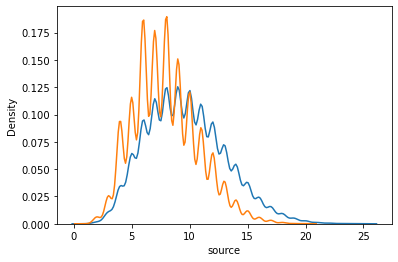

In [14]:
#Plotting the distribution of number of charcters in source and target words
fig, ax = plt.subplots()
sns.kdeplot(df_train.source.str.len(), ax=ax)
sns.kdeplot(df_train.target.str.len(), ax=ax)
plt.show()

In [15]:
df_dev.tail(10)

,target,source,frequency
5673,హైస్కూలు,haiskoolu,1
5674,హైస్కూలు,haiskulu,1
5675,హైస్కూలు,highschool,1
5676,హైస్కూలు,highschoolu,1
5677,హోమియో,heuumiyoo,1
5678,హోమియో,hoemiyoe,1
5679,హోమియో,homeyo,1
5680,హోమేరిక్,homaric,1
5681,హోమేరిక్,homeric,1
5682,హోమేరిక్,homerik,1


In [17]:
text = df_dev.target[5675]
print(text, list(text))

హైస్కూలు ['హ', 'ై', 'స', '్', 'క', 'ూ', 'ల', 'ు']


In [18]:
#Checking how the letters combine to form a word in target language
for i in range(1,len(text)+1):
    print(str(list(text[:i])) + "  -->  " + ''.join(list(text[:i])))

['హ']  -->  హ
['హ', 'ై']  -->  హై
['హ', 'ై', 'స']  -->  హైస
['హ', 'ై', 'స', '్']  -->  హైస్
['హ', 'ై', 'స', '్', 'క']  -->  హైస్క
['హ', 'ై', 'స', '్', 'క', 'ూ']  -->  హైస్కూ
['హ', 'ై', 'స', '్', 'క', 'ూ', 'ల']  -->  హైస్కూల
['హ', 'ై', 'స', '్', 'క', 'ూ', 'ల', 'ు']  -->  హైస్కూలు
